Now that we know how to add `Schedule` instructions, let's learn how to control exactly when they're played.

## Pulse Builder
Here, we will go over the most important Pulse Builder features for learning how to build schedules. This is not exhaustive; for more details about what you can do using the Pulse Builder, check out the [Pulse API reference](/api/qiskit/pulse).

### Alignment contexts
The builder has alignment contexts which influence how a schedule is built. Contexts can also be nested. Try them out, and use `.draw()` to see how the pulses are aligned.

Regardless of the alignment context, the duration of the resulting schedule is as short as it can be while including every instruction and following the alignment rules. This still allows some degrees of freedom for scheduling instructions off the "longest path". The examples below illuminate this.

### `align_left`
The builder has alignment contexts that influence how a schedule is built. The default is `align_left`.

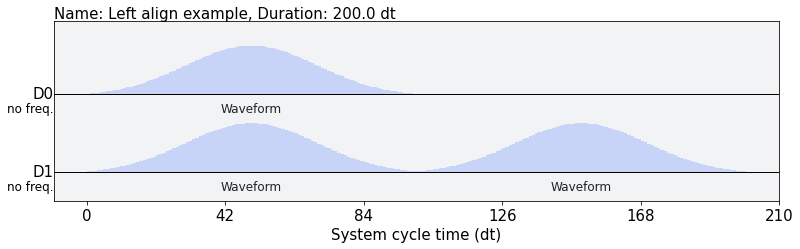

In [ ]:
with pulse.build(backend, name='Left align example') as program:
    with pulse.align_left():
        gaussian_pulse = library.gaussian(100, 0.5, 20)
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))

program.draw()

Notice how there is no scheduling freedom for the pulses on `D1`. The second waveform begins immediately after the first. The pulse on `D0` can start at any time between `t=0` and `t=100` without changing the duration of the overall schedule. The `align_left` context sets the start time of this pulse to `t=0`. You can think of this like left-justification of a text document.


### `align_right`
Unsurprisingly, `align_right` does the opposite of `align_left`. It will choose `t=100` in the above example to begin the gaussian pulse on `D0`. Left and right are also sometimes called "as soon as possible" and "as late as possible" scheduling, respectively.

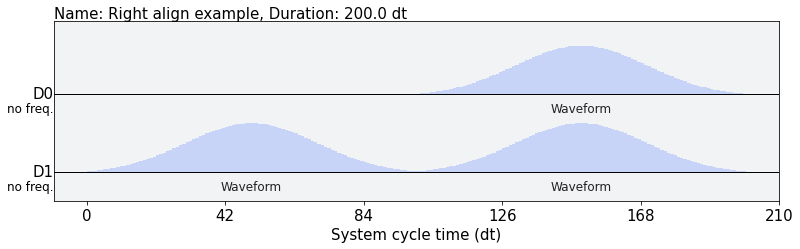

In [ ]:
with pulse.build(backend, name='Right align example') as program:
    with pulse.align_right():
        gaussian_pulse = library.gaussian(100, 0.5, 20)
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))

program.draw()

### `align_equispaced(duration)`

If the duration of a particular block is known, you can also use `align_equispaced` to insert equal duration delays between each instruction.

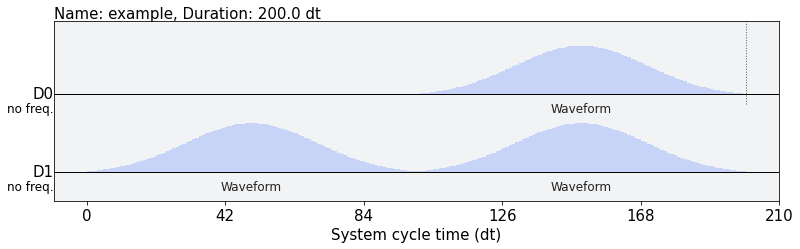

In [ ]:
with pulse.build(backend, name='example') as program:
    gaussian_pulse = library.gaussian(100, 0.5, 20)
    with pulse.align_equispaced(2*gaussian_pulse.duration):
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
    pulse.play(gaussian_pulse, pulse.drive_channel(1))
    pulse.play(gaussian_pulse, pulse.drive_channel(1))

program.draw()

### `align_sequential`

This alignment context does not schedule instructions in parallel. Each instruction will begin at the end of the previously added instruction.

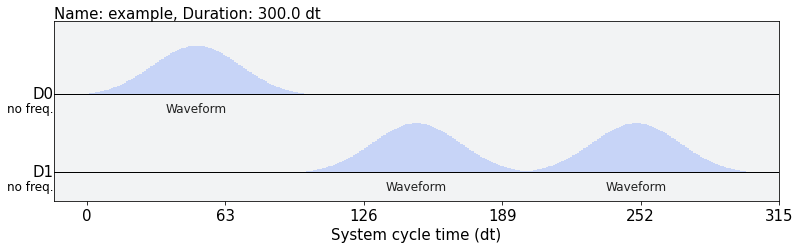

In [ ]:
with pulse.build(backend, name='example') as program:
    with pulse.align_sequential():
        gaussian_pulse = library.gaussian(100, 0.5, 20)
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))

program.draw()

### Phase and frequency offsets

We can use the builder to help us temporarily offset the frequency or phase of our pulses on a channel.

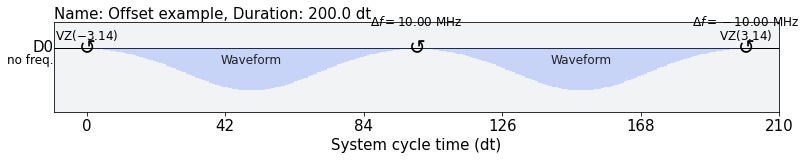

In [ ]:
with pulse.build(backend, name='Offset example') as program:
    with pulse.phase_offset(3.14, pulse.drive_channel(0)):
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        with pulse.frequency_offset(10e6, pulse.drive_channel(0)):
            pulse.play(gaussian_pulse, pulse.drive_channel(0))

program.draw()

We encourage you to visit the [Pulse API reference](/api/qiskit/pulse) to learn more.